# Stock Market Analysis for Secondary Batteries Stocks (2022 - 2023)

# 0. Introduction

Modern society has entered the era of Battery of Things (BOT), leading to a significant increase in demand for secondary batteries in the IT industry, energy storage systems (ESS), and electric vehicle sectors. Furthermore, as we approach the transitional period towards a carbon-neutral society, secondary batteries have solidified their position as essential components of future industries. Currently, China, South Korea, and Japan are leading nations in terms of global market share for secondary batteries, with China holding 56.4% and South Korea holding 25.8%.

Possibly due to the promising prospects of secondary batteries, a considerable amount of investment capital has been directed towards secondary battery companies by investors. Amidst this trend, I have embarked on this project to analyze the stock prices of secondary battery companies.

These are the companies and their tickers.  
{company: ticker name}  
{LG Energy Solution: 373220.KS}   
{Eco Pro : 086520.KQ}  
{SK innovation : 096770.KS}  
{Samsung SDI: 006400.KS}  
{Posco Future M:003670.KS} 

{Kosdaq Composite Index : ^KQ11}  
{KOSPI Composite Index: ^KS11}

# 1. Data Collection

Basic Set Up

In [ ]:
!pip install -q yfinance

In [ ]:
!pip install pandas-datareader

In [1]:
# 0. basic setup
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import AutoDateLocator, DateFormatter

import pandas as pd
import numpy as np

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style('whitegrid')
# plt.style.use("fivethirtyeight")
%matplotlib inline

from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

from datetime import datetime

I collected data from Yahoo finance.   
I imported historical prices of LG Energy solution(373220.KS), Ecopro(086520.KQ), SK Innovation(096770.KS), Samsung SDI(006400.KS), Posco Future M(003670.KS), Kosdaq Composite Index(^KQ11), KOSPI Composite Index (^KS11). 

Given that LG Energy Solution recently went public, I conducted a stock analysis focusing on the day following its listing date, which was January 27, 2022.

In [2]:
# Seconday Batteries' companies
secc_list = ['373220.KS', '086520.KQ', '096770.KS', '006400.KS', '003670.KS', '^KQ11', '^KS11']
new_name = ['lg_ensol', 'eco_pro', 'sk_inv', 's_sdi', 'psc_fm', 'kosdaq', 'kospi']

# Set up End and Start times for data grab

end = datetime(2023, 8, 7)
start = datetime(2022, 1, 28)

# Create a dictionary to map old stock symbols to new names
stock_mapping = dict(zip(secc_list, new_name))

# download 'historical data' from yfinance libray -> return data as pandas data frame
for stock in secc_list: 
    globals()[stock_mapping[stock]] = yf.download(stock, start, end)
    
"""
globals() function to access the global symbol table 
-> then it dynamically creates a variable with the name of the current stock symbol (stock) 
& assigns it the value returned by yf.download()
After running the loop, the code will create four global variables (AAPL, GOOG, MSFT, and AMZN), 
each containing the historical stock data fetched for the corresponding stock symbol. 
"""

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


'\nglobals() function to access the global symbol table \n-> then it dynamically creates a variable with the name of the current stock symbol (stock) \n& assigns it the value returned by yf.download()\nAfter running the loop, the code will create four global variables (AAPL, GOOG, MSFT, and AMZN), \neach containing the historical stock data fetched for the corresponding stock symbol. \n'

# 2. Data preprocessing

## 2-1. Explore data frame

(1) Check the columns of data frames: 

The columns of all data frames are 'Open', 'High', 'Low', 'Close', 'Adj Close', and 'Volume'.

In [3]:
new_name = ['lg_ensol', 'eco_pro', 'sk_inv', 's_sdi', 'psc_fm', 'kosdaq', 'kospi']

for val in new_name:
    print(globals()[val].columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


(2) Check how data looks like  

The Index of all dataframes is datetimeindex.

In [4]:
for val in new_name:
    print(f"This is {val.upper()}")
    print(globals()[val].head(1))
    print(globals()[val].tail(1))
    print("\n")

This is LG_ENSOL
                Open      High       Low     Close  Adj Close   Volume
Date                                                                  
2022-01-28  476000.0  483000.0  445000.0  450000.0   450000.0  4559773
                Open      High       Low     Close  Adj Close  Volume
Date                                                                 
2023-08-04  545000.0  548000.0  540000.0  540000.0   540000.0  164545


This is ECO_PRO
                    Open         High           Low         Close  \
Date                                                                
2022-01-28  63398.058594  65242.71875  56504.855469  63300.972656   

               Adj Close   Volume  
Date                               
2022-01-28  63017.742188  2018722  
                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2023-08-04  1207000.0  1235000.0  1167000.0  1174000.0  1174000.0  707765


Th

Some data for Kosdaq's volume of sale is written with different unit. I tried to update the 'Volume' column of the kosdaq DataFrame by multiplying the values less than 10,000 by 1000 and keeping the other values unchanged. 

In [5]:
cond = kosdaq['Volume'] < 10000
kosdaq.loc[cond ,'Volume'] = kosdaq.loc[cond, 'Volume'] * 1000

In [6]:
kosdaq['Volume']

Date
2022-01-28    1000000
2022-02-03    1100000
2022-02-04    1100000
2022-02-07     900000
2022-02-08    1200000
               ...   
2023-07-31     700000
2023-08-01     900000
2023-08-02    1000000
2023-08-03    1100000
2023-08-04    1100000
Name: Volume, Length: 373, dtype: int64

## 2-2. Create new data frame 

(1) Create a new dataframe called "adjcls_data" that displays the adjusted closing price for all stocks

In [7]:
adjcls_data = pd.concat([globals()[val]["Adj Close"] for val in new_name], axis = 1 ) # axis 1 = columns 
adjcls_data.columns = new_name

print(adjcls_data.shape)
adjcls_data

(374, 7)


lg_ensol       eco_pro         sk_inv        s_sdi         psc_fm  \
Date                                                                            
2022-01-28  450000.0  6.301774e+04  216000.000000  593019.5000  110324.601562   
2022-02-03  477000.0  6.833365e+04  218500.000000  583036.0000  111822.218750   
2022-02-04  504000.0  6.959014e+04  228000.000000  586031.0625  113819.046875   
2022-02-07  548000.0  6.591733e+04  226500.000000  567062.4375  111323.015625   
2022-02-08  548000.0  6.562737e+04  226500.000000  567062.4375  111323.015625   
...              ...           ...            ...          ...            ...   
2023-07-31  560000.0  1.207000e+06  212968.640625  665000.0000  527000.000000   
2023-08-01  557000.0  1.208000e+06  204587.937500  670000.0000  509000.000000   
2023-08-02  544000.0  1.118000e+06  196601.609375  650000.0000  486000.000000   
2023-08-03  543000.0  1.207000e+06  206500.000000  639000.0000  488500.000000   
2023-08-04  540000.0  1.174000e+06  203000.000000  635000.0000  480500.000000   

                kosdaq        kospi  
Date                                 
2022-01-28  872.869995  2663.340088  
2022-02-03  891.599976  2707.820068  
2022-02-04  902.869995  2750.260010  
2022-02-07  899.400024  2745.060059  
2022-02-08  895.270020  2746.469971  
...                ...          ...  
2023-07-31  935.969971  2632.580078  
2023-08-01  939.669983  2667.070068  
2023-08-02  909.760010  2616.469971  
2023-08-03  920.320007  2605.389893  
2023-08-04  918.429993  2602.800049  

[374 rows x 7 columns]

(2) Create a new dataframe called "vol_data" that displays volume of sales for all stocks

In [8]:
vol_data = pd.concat([globals()[val]["Volume"] for val in new_name], axis = 1 ) # axis 1 = columns 
vol_data.columns = new_name

print(vol_data.shape)
vol_data

(374, 7)


lg_ensol    eco_pro   sk_inv   s_sdi   psc_fm     kosdaq   kospi
Date                                                                        
2022-01-28   4559773  2018722.0  1507157       0   717089  1000000.0  433700
2022-02-03   2918435  1186778.0   663512  536499   244066  1100000.0  435300
2022-02-04   2088996   655530.0   603614  439674   140206  1100000.0  535900
2022-02-07   1911176  1945018.0   503687  375857   272587   900000.0  417600
2022-02-08         0   969207.0        0       0        0  1200000.0  559600
...              ...        ...      ...     ...      ...        ...     ...
2023-07-31    378890  1331266.0  2513184  396958  1119804   700000.0  454200
2023-08-01    406755  1640013.0  1857666  316546  1086541   900000.0  493600
2023-08-02    273058  1068575.0  1053871  278182   901214  1000000.0  704700
2023-08-03    299858  1295443.0  1262378  239993   862043  1100000.0  789400
2023-08-04    164545   707765.0   697439  140213   485788  1100000.0  645800

[374 rows x 7 columns]

## 2-3. Identify Null values

(1) 1st try of verifying null values

In [9]:
for val in new_name:
    print(f"Null values in {val}:")
    null_counts1 = adjcls_data[val].isnull().sum()
    null_counts2 = vol_data[val].isnull().sum()
    print(null_counts1, null_counts2)
    print("\n")

Null values in lg_ensol:
0 0


Null values in eco_pro:
1 1


Null values in sk_inv:
0 0


Null values in s_sdi:
0 0


Null values in psc_fm:
0 0


Null values in kosdaq:
1 1


Null values in kospi:
0 0




(2) Removing Null values

'eco_pro' null value index is 2023-07-11  
'kosdaq' null value index is 2022-12-26

In [10]:
null_positions = adjcls_data.isnull()
indices_with_null = null_positions[null_positions.any(axis=1)].index.tolist()

print("Indices with null values:", indices_with_null)

Indices with null values: [Timestamp('2022-12-26 00:00:00'), Timestamp('2023-07-11 00:00:00')]


(3) Filling 'eco_pro' null values  

The information for July 11, 2023, is missing. I obtained the 'eco_pro' information from 'Naver Finance'.

In [11]:
## Putting values inside 'vol_data'
new_row_index1 = pd.to_datetime(['2023-07-11'])
new_inf1 = float(718455)
vol_data.loc[new_row_index1, 'eco_pro'] = new_inf1


## Putting values inside 'eco_pro'
new_inf2 = {
    'Open': float(974000),
    'High': float(998000),
    'Low': float(958000),
    'Close': float(976000),
    'Adj Close': float(976000),
    'Volume': float(718455)
}

new_row_index2 = pd.to_datetime(['2023-07-11'])

# To add a new row with the specified index and values, I need to create a new DataFrame 
# then concatenate it with the original 'eco_pro' DataFrame.

new_row_df = pd.DataFrame(new_inf2, index=new_row_index2)
eco_pro = pd.concat([eco_pro, new_row_df])
eco_pro


## Putting values insife 'adjcls_data'  

target_date = pd.Timestamp('2023-07-11')
new = eco_pro.loc[target_date, 'Adj Close']

print(new)
adjcls_data['eco_pro'] = adjcls_data['eco_pro'].fillna(new)
adjcls_data

976000.0


lg_ensol       eco_pro         sk_inv        s_sdi         psc_fm  \
Date                                                                            
2022-01-28  450000.0  6.301774e+04  216000.000000  593019.5000  110324.601562   
2022-02-03  477000.0  6.833365e+04  218500.000000  583036.0000  111822.218750   
2022-02-04  504000.0  6.959014e+04  228000.000000  586031.0625  113819.046875   
2022-02-07  548000.0  6.591733e+04  226500.000000  567062.4375  111323.015625   
2022-02-08  548000.0  6.562737e+04  226500.000000  567062.4375  111323.015625   
...              ...           ...            ...          ...            ...   
2023-07-31  560000.0  1.207000e+06  212968.640625  665000.0000  527000.000000   
2023-08-01  557000.0  1.208000e+06  204587.937500  670000.0000  509000.000000   
2023-08-02  544000.0  1.118000e+06  196601.609375  650000.0000  486000.000000   
2023-08-03  543000.0  1.207000e+06  206500.000000  639000.0000  488500.000000   
2023-08-04  540000.0  1.174000e+06  203000.000000  635000.0000  480500.000000   

                kosdaq        kospi  
Date                                 
2022-01-28  872.869995  2663.340088  
2022-02-03  891.599976  2707.820068  
2022-02-04  902.869995  2750.260010  
2022-02-07  899.400024  2745.060059  
2022-02-08  895.270020  2746.469971  
...                ...          ...  
2023-07-31  935.969971  2632.580078  
2023-08-01  939.669983  2667.070068  
2023-08-02  909.760010  2616.469971  
2023-08-03  920.320007  2605.389893  
2023-08-04  918.429993  2602.800049  

[374 rows x 7 columns]

(4) Filling 'kosdaq' null values


The information for December 26, 2022, is missing. I obtained the 'kosdaq' information from 'Naver Finance'.

In [12]:
## vol_data에 값 집어넣기
new_row_index11 = pd.to_datetime(['2022-12-26'])
new_inf11 = float(797.707)
vol_data.loc[new_row_index11, 'kosdaq'] = new_inf11


# eco_pro에 값 집어넣기 
new_inf22 = {
    'Close': float(694.68),
    'Adj Close': float(797.707),
    'Volume': float(797.707)
}

new_row_index22 = pd.to_datetime(['2022-12-26'])

new_row_df1 = pd.DataFrame(new_inf22, index=new_row_index22)
kosdaq = pd.concat([kosdaq, new_row_df1])
kosdaq


# adjcls_data에 값 집어넣기  

target_date = pd.Timestamp('2022-12-26')
new = kosdaq.loc[target_date, 'Adj Close']

print(new)
adjcls_data['kosdaq'] = adjcls_data['kosdaq'].fillna(new)
adjcls_data

797.707


lg_ensol       eco_pro         sk_inv        s_sdi         psc_fm  \
Date                                                                            
2022-01-28  450000.0  6.301774e+04  216000.000000  593019.5000  110324.601562   
2022-02-03  477000.0  6.833365e+04  218500.000000  583036.0000  111822.218750   
2022-02-04  504000.0  6.959014e+04  228000.000000  586031.0625  113819.046875   
2022-02-07  548000.0  6.591733e+04  226500.000000  567062.4375  111323.015625   
2022-02-08  548000.0  6.562737e+04  226500.000000  567062.4375  111323.015625   
...              ...           ...            ...          ...            ...   
2023-07-31  560000.0  1.207000e+06  212968.640625  665000.0000  527000.000000   
2023-08-01  557000.0  1.208000e+06  204587.937500  670000.0000  509000.000000   
2023-08-02  544000.0  1.118000e+06  196601.609375  650000.0000  486000.000000   
2023-08-03  543000.0  1.207000e+06  206500.000000  639000.0000  488500.000000   
2023-08-04  540000.0  1.174000e+06  203000.000000  635000.0000  480500.000000   

                kosdaq        kospi  
Date                                 
2022-01-28  872.869995  2663.340088  
2022-02-03  891.599976  2707.820068  
2022-02-04  902.869995  2750.260010  
2022-02-07  899.400024  2745.060059  
2022-02-08  895.270020  2746.469971  
...                ...          ...  
2023-07-31  935.969971  2632.580078  
2023-08-01  939.669983  2667.070068  
2023-08-02  909.760010  2616.469971  
2023-08-03  920.320007  2605.389893  
2023-08-04  918.429993  2602.800049  

[374 rows x 7 columns]

(5) Rechecking to find null values

In [13]:
for val in new_name:
    print(f"Null values in {val}:")
    null_counts1 = adjcls_data[val].isnull().sum()
    null_counts2 = vol_data[val].isnull().sum()
    print(null_counts1, null_counts2)
    print("\n")

Null values in lg_ensol:
0 0


Null values in eco_pro:
0 0


Null values in sk_inv:
0 0


Null values in s_sdi:
0 0


Null values in psc_fm:
0 0


Null values in kosdaq:
0 0


Null values in kospi:
0 0




# 3. Data Visualization

## 3-1. Plot Stock price (Adjusted Closing price)

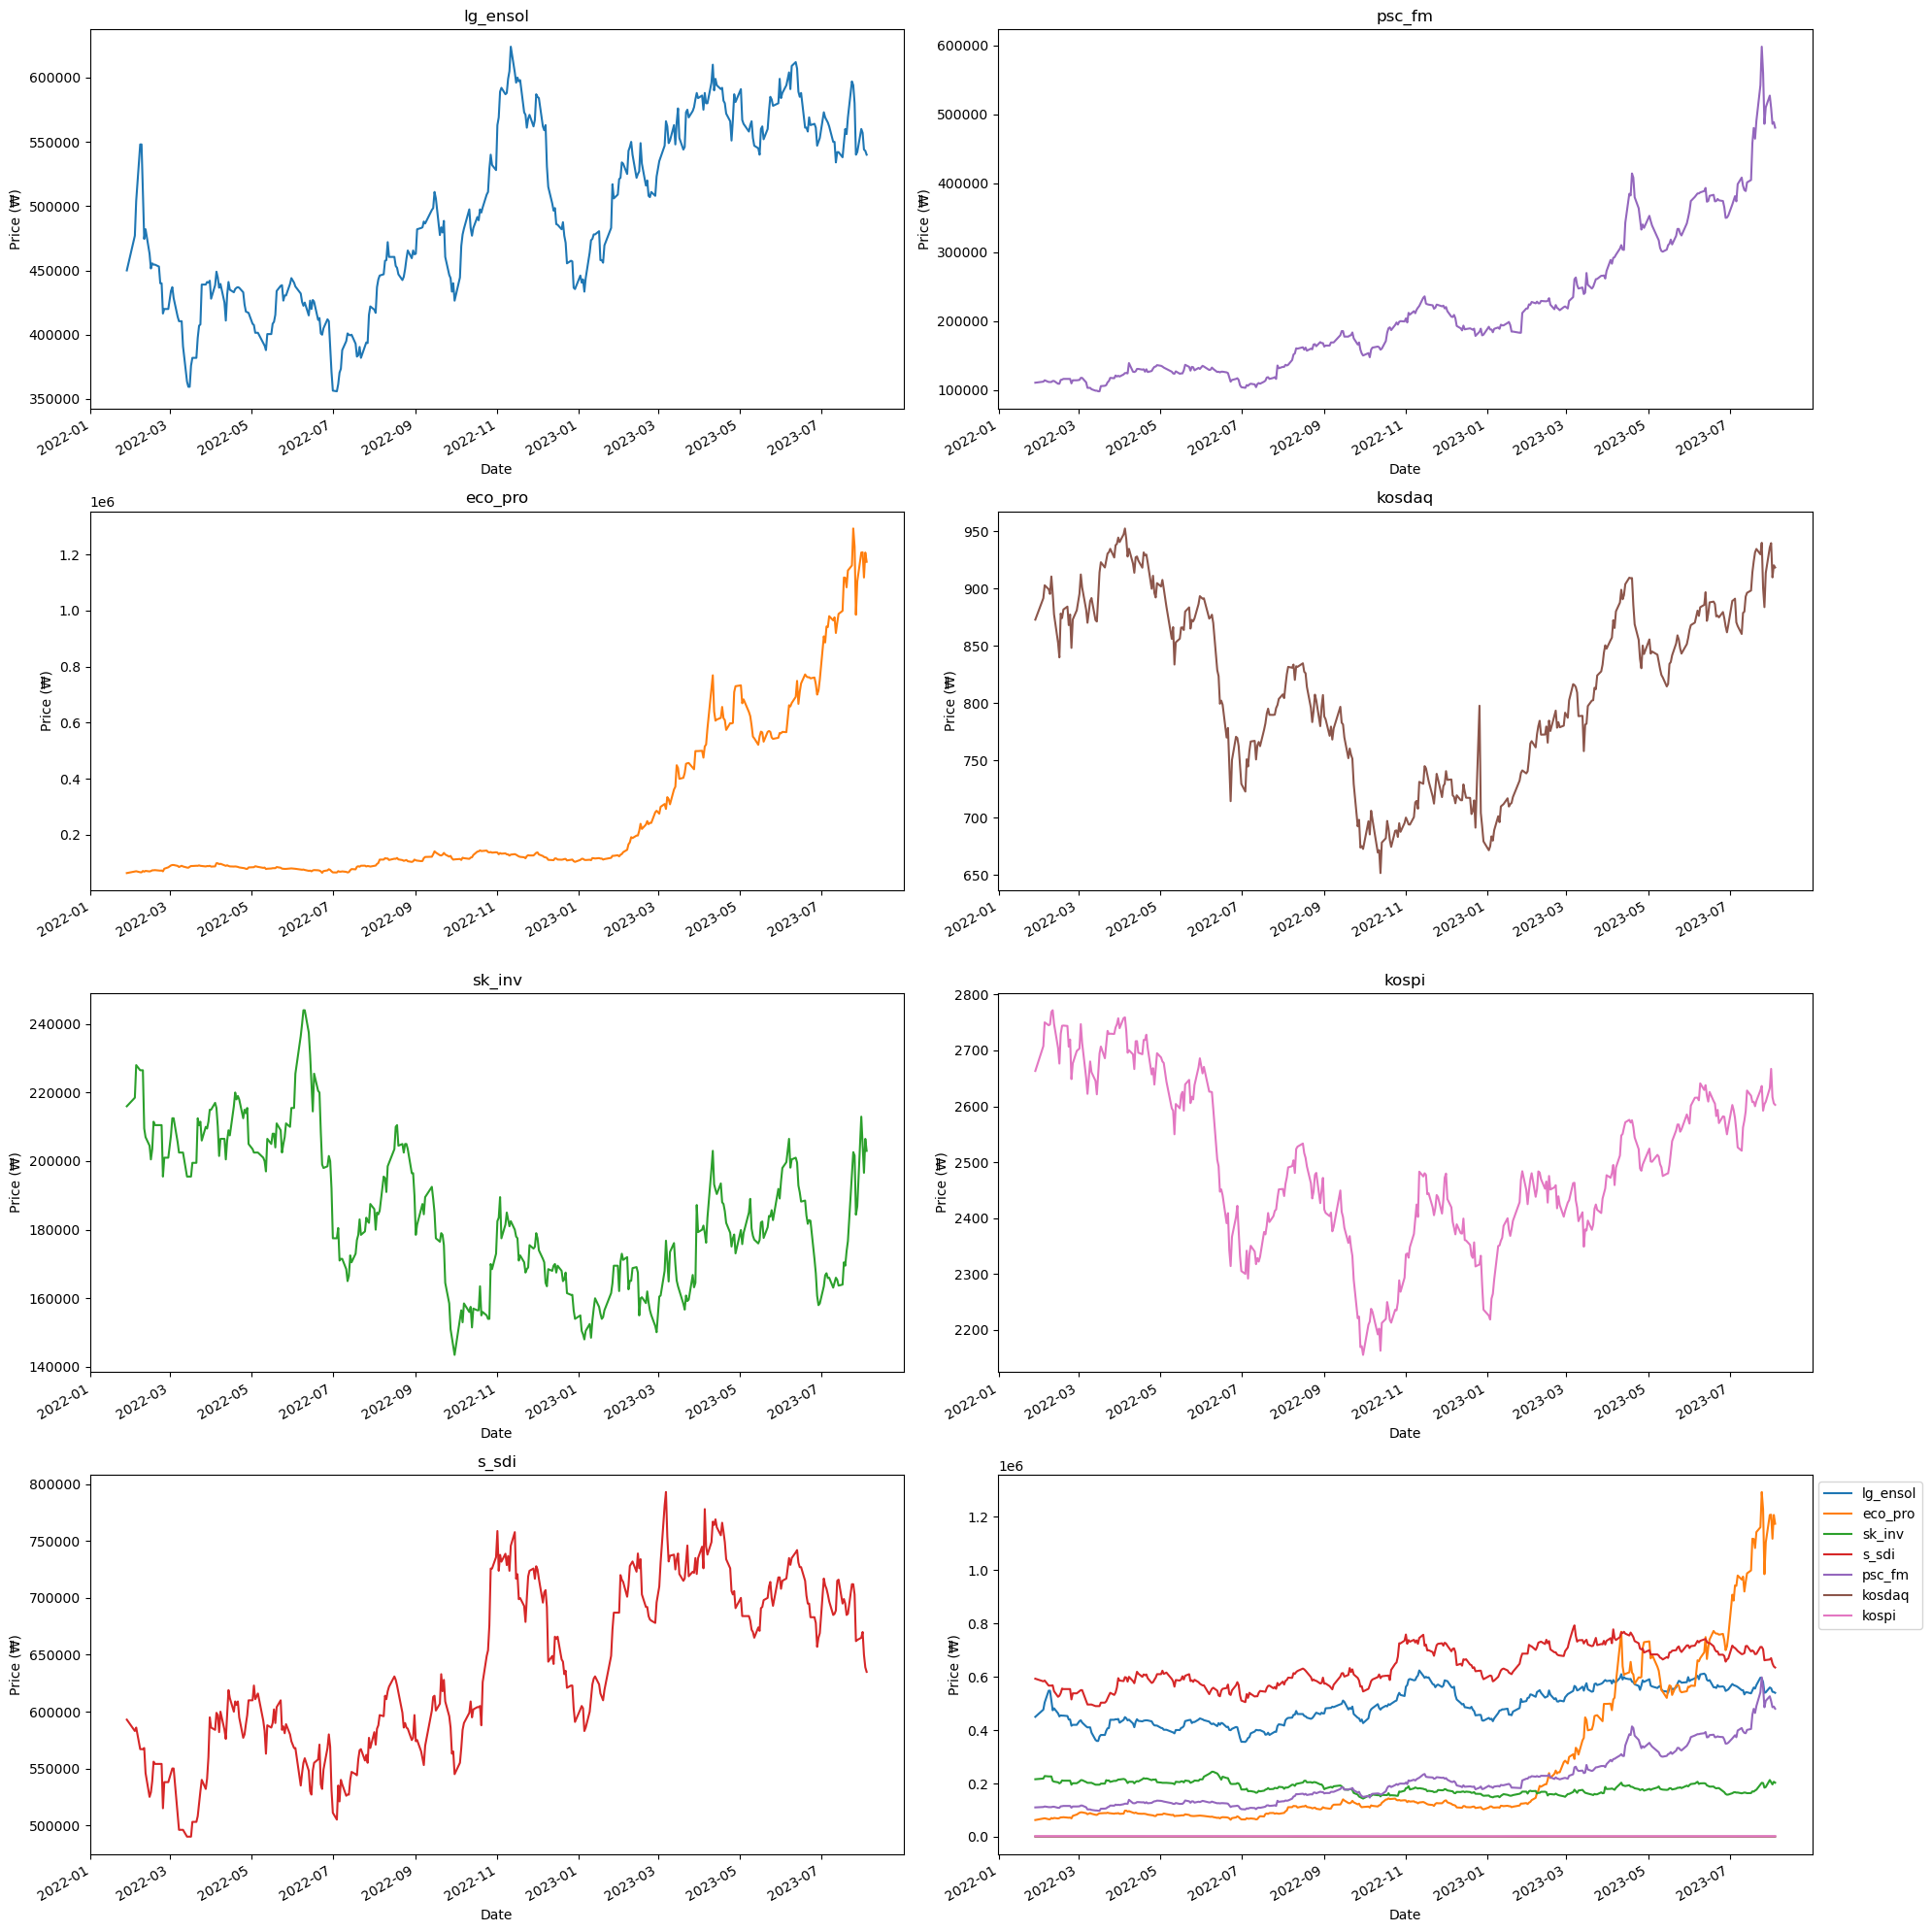

In [14]:
# 1. create 4*2 grids subplots
fig, axes = plt.subplots(4, 2, figsize = (20, 20))

# 2. Draw line plots for each value of new_names

for i, val in enumerate(new_name):
    row = i % 4
    col = i // 4
    ax = globals()[val]['Adj Close'].plot(ax=axes[row, col], color=f'C{i}', label=val)
    axes[row, col].set_title(f"{val}")

    # Label y-axis
    axes[row, col].set_ylabel("Price (₩)")

    
# 3. Create a new subplot at (4,2,8) to plot stock prices with date on x-axis and adjusted closing price on y-axis

row, col = 3, 1  # row 3 , column 1 
ax_new = plt.subplot2grid((4, 2), (row, col), colspan=1)

# Plot stock prices for each variable with different colors
for i, val in enumerate(new_name):
    globals()[val]['Adj Close'].plot(ax=ax_new, color=f'C{i}', label=val)


# y-axis label
ax_new.set_ylabel("Price (₩)")

# Show legend for the stocks in the new subplot
legend = ax_new.legend(loc='upper left', bbox_to_anchor=(1,1))

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

## 3-2 Plot Volume of sales

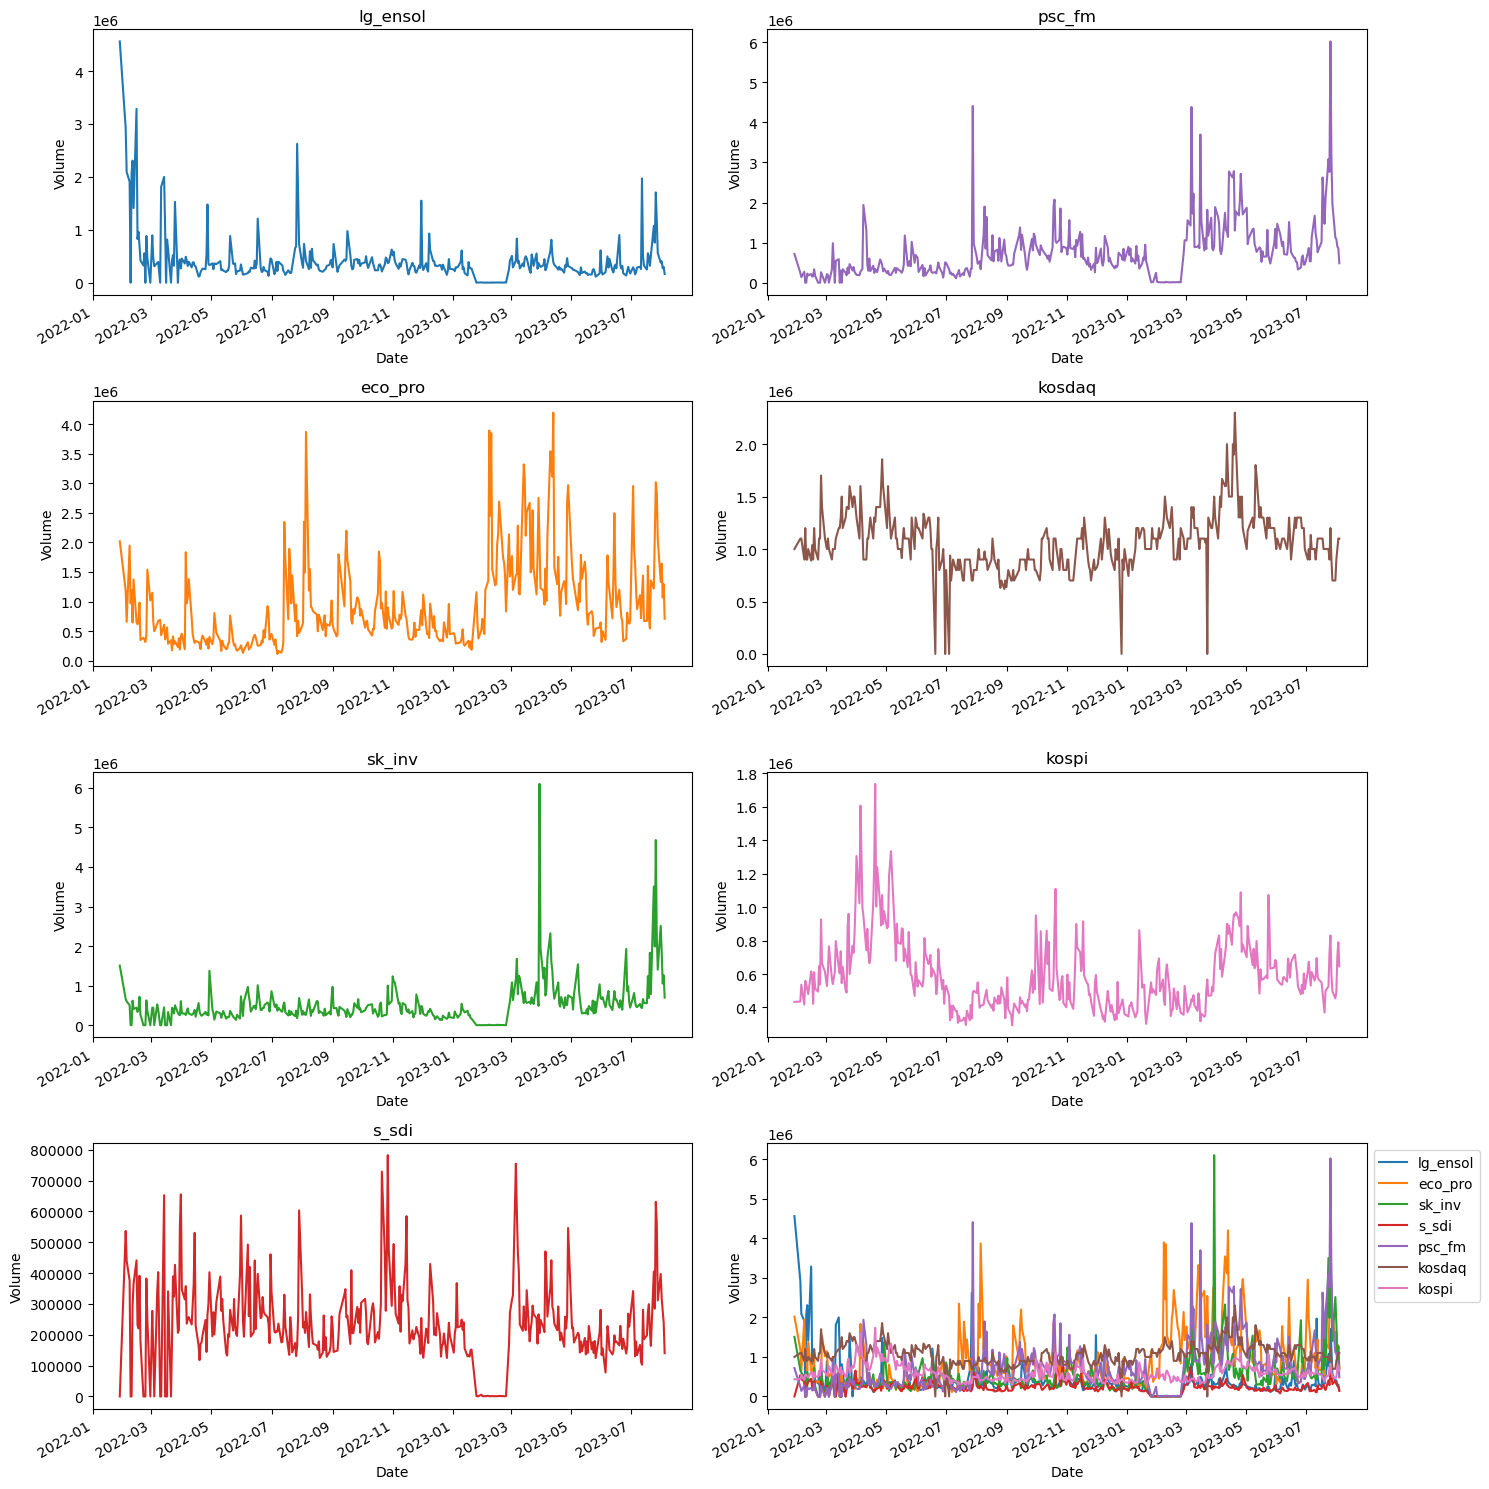

In [15]:
fig, axes = plt.subplots(4, 2, figsize = (15, 15))

for i, val in enumerate(new_name):
    row = i % 4
    col = i // 4
    ax = globals()[val]['Volume'].plot(ax=axes[row, col], color=f'C{i}', label=val)
    axes[row, col].set_title(f"{val}")
    
    axes[row, col].set_ylabel("Volume")

    
row, col = 3, 1  
ax_new = plt.subplot2grid((4, 2), (row, col), colspan=1)

# Plot stock prices for each variable with different colors
for i, val in enumerate(new_name):
    globals()[val]['Volume'].plot(ax=ax_new, color=f'C{i}', label=val)

ax_new.set_ylabel("Volume")

legend = ax_new.legend(loc='upper left', bbox_to_anchor=(1,1))

plt.tight_layout()
plt.show()

## 3-3  Plot Stock price and Volume of Sale

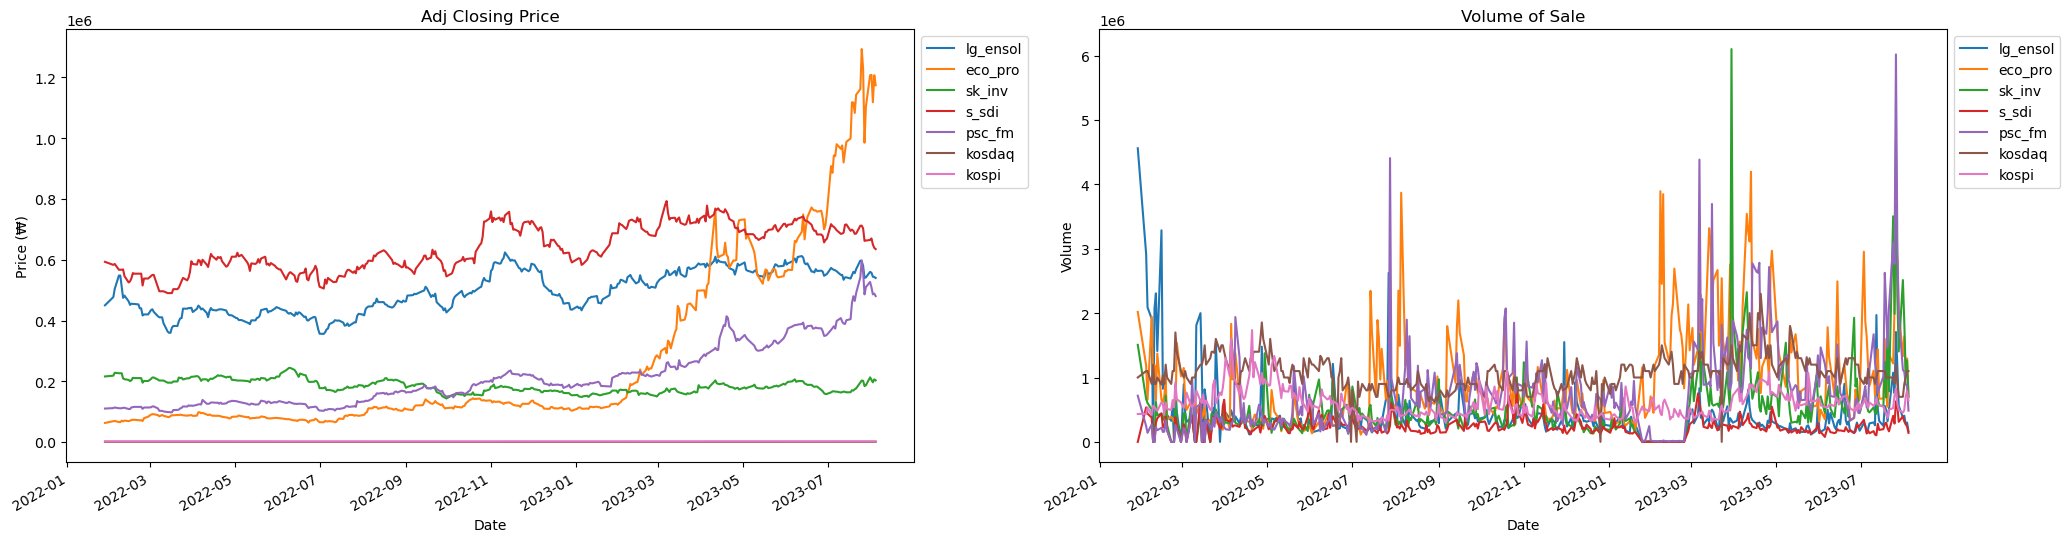

In [16]:
fig, axes = plt.subplots(1, 2, figsize = (30, 10))

#### for stock price 

ax1 = plt.subplot2grid((2, 3), (0, 0))

for i, val in enumerate(new_name):
    globals()[val]['Adj Close'].plot(ax=ax1, color=f'C{i}', label=val)

# Hide date values on x-axis
#ax1.set_xticklabels([])

# Add Korean currency symbol as y-axis label
ax1.set_ylabel("Price (₩)")

# Show legend for the stocks in the new subplot
legend = ax1.legend(loc='upper left', bbox_to_anchor=(1,1))

# Set title for the subplot
ax1.set_title("Adj Closing Price")

##### for volume 

ax2 = plt.subplot2grid((2, 3), (0, 1))


for i, val in enumerate(new_name):
    globals()[val]['Volume'].plot(ax=ax2, color=f'C{i}', label=val)
    
# Hide date values on x-axis
# ax2.set_xticklabels([])

# Add Korean currency symbol as y-axis label
ax2.set_ylabel("Volume")

# Show legend for the stocks in the new subplot
legend = ax2.legend(loc='upper left', bbox_to_anchor=(1,1))

# Set title for the subplot
ax2.set_title("Volume of Sale")

###### 
plt.tight_layout()
plt.show()

While the Kospi and Kosdaq indices experience relatively modest fluctuations, stocks associated with secondary batteries demonstrate notable volatility in both price and sales volume.
Especially, eco_pro and psc_fm have dramatic uptrend contrasted to others. Corresponding to the high demand for eco_pro and psc_fm, the volumes of transaction of these stocks are exhibiting higher spike than others.


While the Kospi and Kosdaq indices show relatively moderate fluctuations, stocks related to the secondary battery sector exhibit significant volatility in both their prices and trading volumes. Notably, eco_pro and psc_fm stand out with their pronounced upward trends, setting them apart from the rest. Reflecting the strong demand for eco_pro and psc_fm, the transaction volumes for these stocks experience notable spikes compared to other stocks.

# 4. Moving Average of adjusted closing price

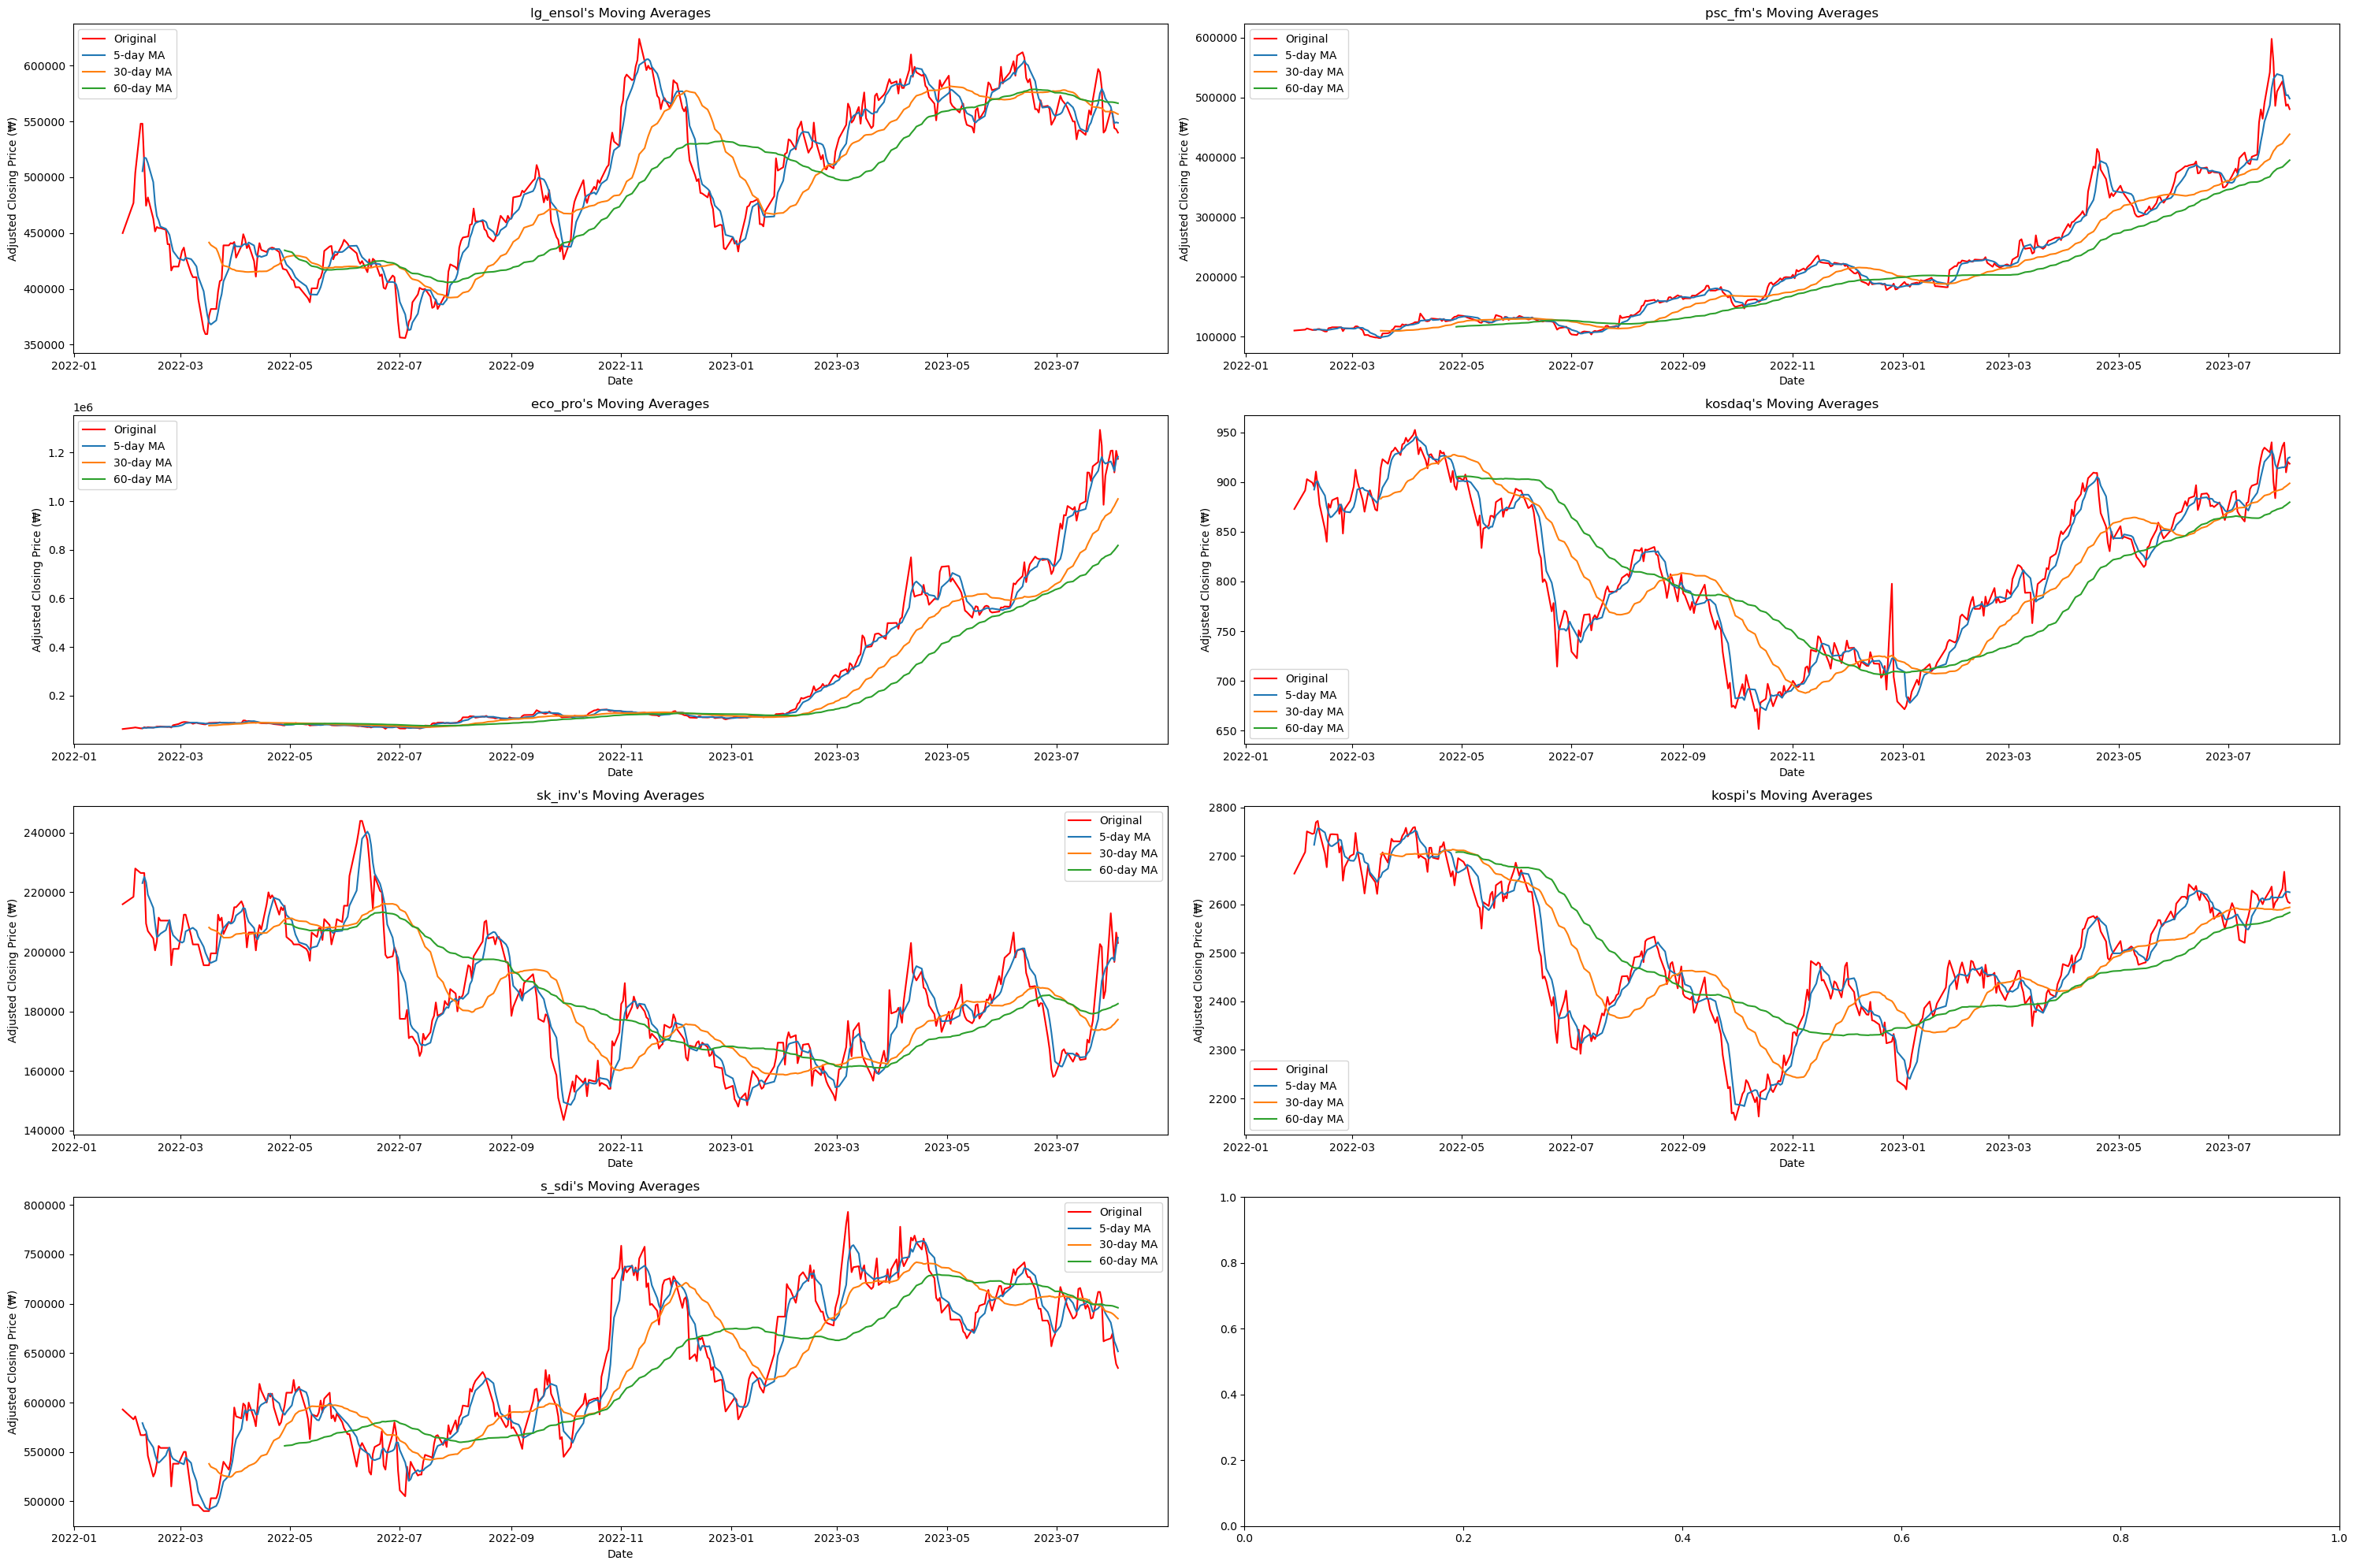

In [19]:
# moving average with a period
ma_day = [5, 30, 60]

# Create a figure and axes with 2 rows and 3 columns
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(30, 20))

# Loop through each stock (val) and plot the moving averages for each period (ma) on the corresponding subplot
for i, val in enumerate(new_name):
    axes_row = i % 4
    axes_col = i // 4

    axes[axes_row, axes_col].plot(adjcls_data[val], label="Original", color='red')

    for ma in ma_day:
        column_name = f"MA of {val} for {ma} days"
        adjcls_data[column_name] = adjcls_data[val].rolling(ma).mean()

        axes[axes_row, axes_col].plot(adjcls_data[column_name], label=f"{ma}-day MA")

    axes[axes_row, axes_col].set_title(f"{val}'s Moving Averages")
    axes[axes_row, axes_col].set_xlabel("Date")
    axes[axes_row, axes_col].set_ylabel("Adjusted Closing Price (₩)")
    axes[axes_row, axes_col].legend()
    

plt.tight_layout()
plt.show()

The utilization of moving averages provides a clearer depiction of the stock price's growth rate over varying time frames, including 5 days, 30 days, and 60 days. However, it's important to note that the 60-day moving average may not accurately capture the magnitude of growth and decline rates. Instead, it excels in highlighting the overall stock price trend.Specifically, the 60-day moving averages for 'eco_pro' and 'psc_fm' prove more insightful compared to others due to their consistent and significant upward trajectories in the actual stock price over extended periods. On the other hand, the 30-day moving average effectively reveals periods of both decline and upsurge.For a more immediate perspective, the 2-day moving average serves as a valuable indicator of the stock price's near-future trajectory. Notably, the actual stock price tends to hover slightly above or below the moving average in this case.

While both the Kosdaq and Kospi indices are exhibiting a U-shaped uptrend, the adjusted closing prices of secondary battery companies are generally displaying an upward trajectory, except for 'sk_inv'. This indicates a substantial volume of stock transactions occurring within the secondary battery stock market. 
This observation is further supported by the plot depicting the 'volume of sale'. The volume and volatility of secondary battery stocks exhibit a significantly larger scale when compared to the Kospi and Kosdaq indices.

# 5. Return

## 5-1. Daily return (%)

Calculating daily return using adjusted closing price

In [20]:
# pct_change(): to calculate the percentage change between the current and a previous price
data_list = "lg_ensol	eco_pro	sk_inv	s_sdi	psc_fm	kosdaq	kospi".split('\t')
daily_return = pd.concat((adjcls_data[i].pct_change() for i in data_list), axis = 1)
daily_return

lg_ensol   eco_pro    sk_inv     s_sdi    psc_fm    kosdaq  \
Date                                                                     
2022-01-28       NaN       NaN       NaN       NaN       NaN       NaN   
2022-02-03  0.060000  0.084356  0.011574 -0.016835  0.013575  0.021458   
2022-02-04  0.056604  0.018388  0.043478  0.005137  0.017857  0.012640   
2022-02-07  0.087302 -0.052778 -0.006579 -0.032368 -0.021930 -0.003843   
2022-02-08  0.000000 -0.004399  0.000000  0.000000  0.000000 -0.004592   
...              ...       ...       ...       ...       ...       ...   
2023-07-31  0.033210  0.093297  0.139842  0.003017  0.033333  0.024329   
2023-08-01 -0.005357  0.000829 -0.039352  0.007519 -0.034156  0.003953   
2023-08-02 -0.023339 -0.074503 -0.039036 -0.029851 -0.045187 -0.031830   
2023-08-03 -0.001838  0.079606  0.050347 -0.016923  0.005144  0.011607   
2023-08-04 -0.005525 -0.027341 -0.016949 -0.006260 -0.016377 -0.002054   

               kospi  
Date                  
2022-01-28       NaN  
2022-02-03  0.016701  
2022-02-04  0.015673  
2022-02-07 -0.001891  
2022-02-08  0.000514  
...              ...  
2023-07-31  0.009301  
2023-08-01  0.013101  
2023-08-02 -0.018972  
2023-08-03 -0.004235  
2023-08-04 -0.000994  

[374 rows x 7 columns]

Plotting daily return with line plot

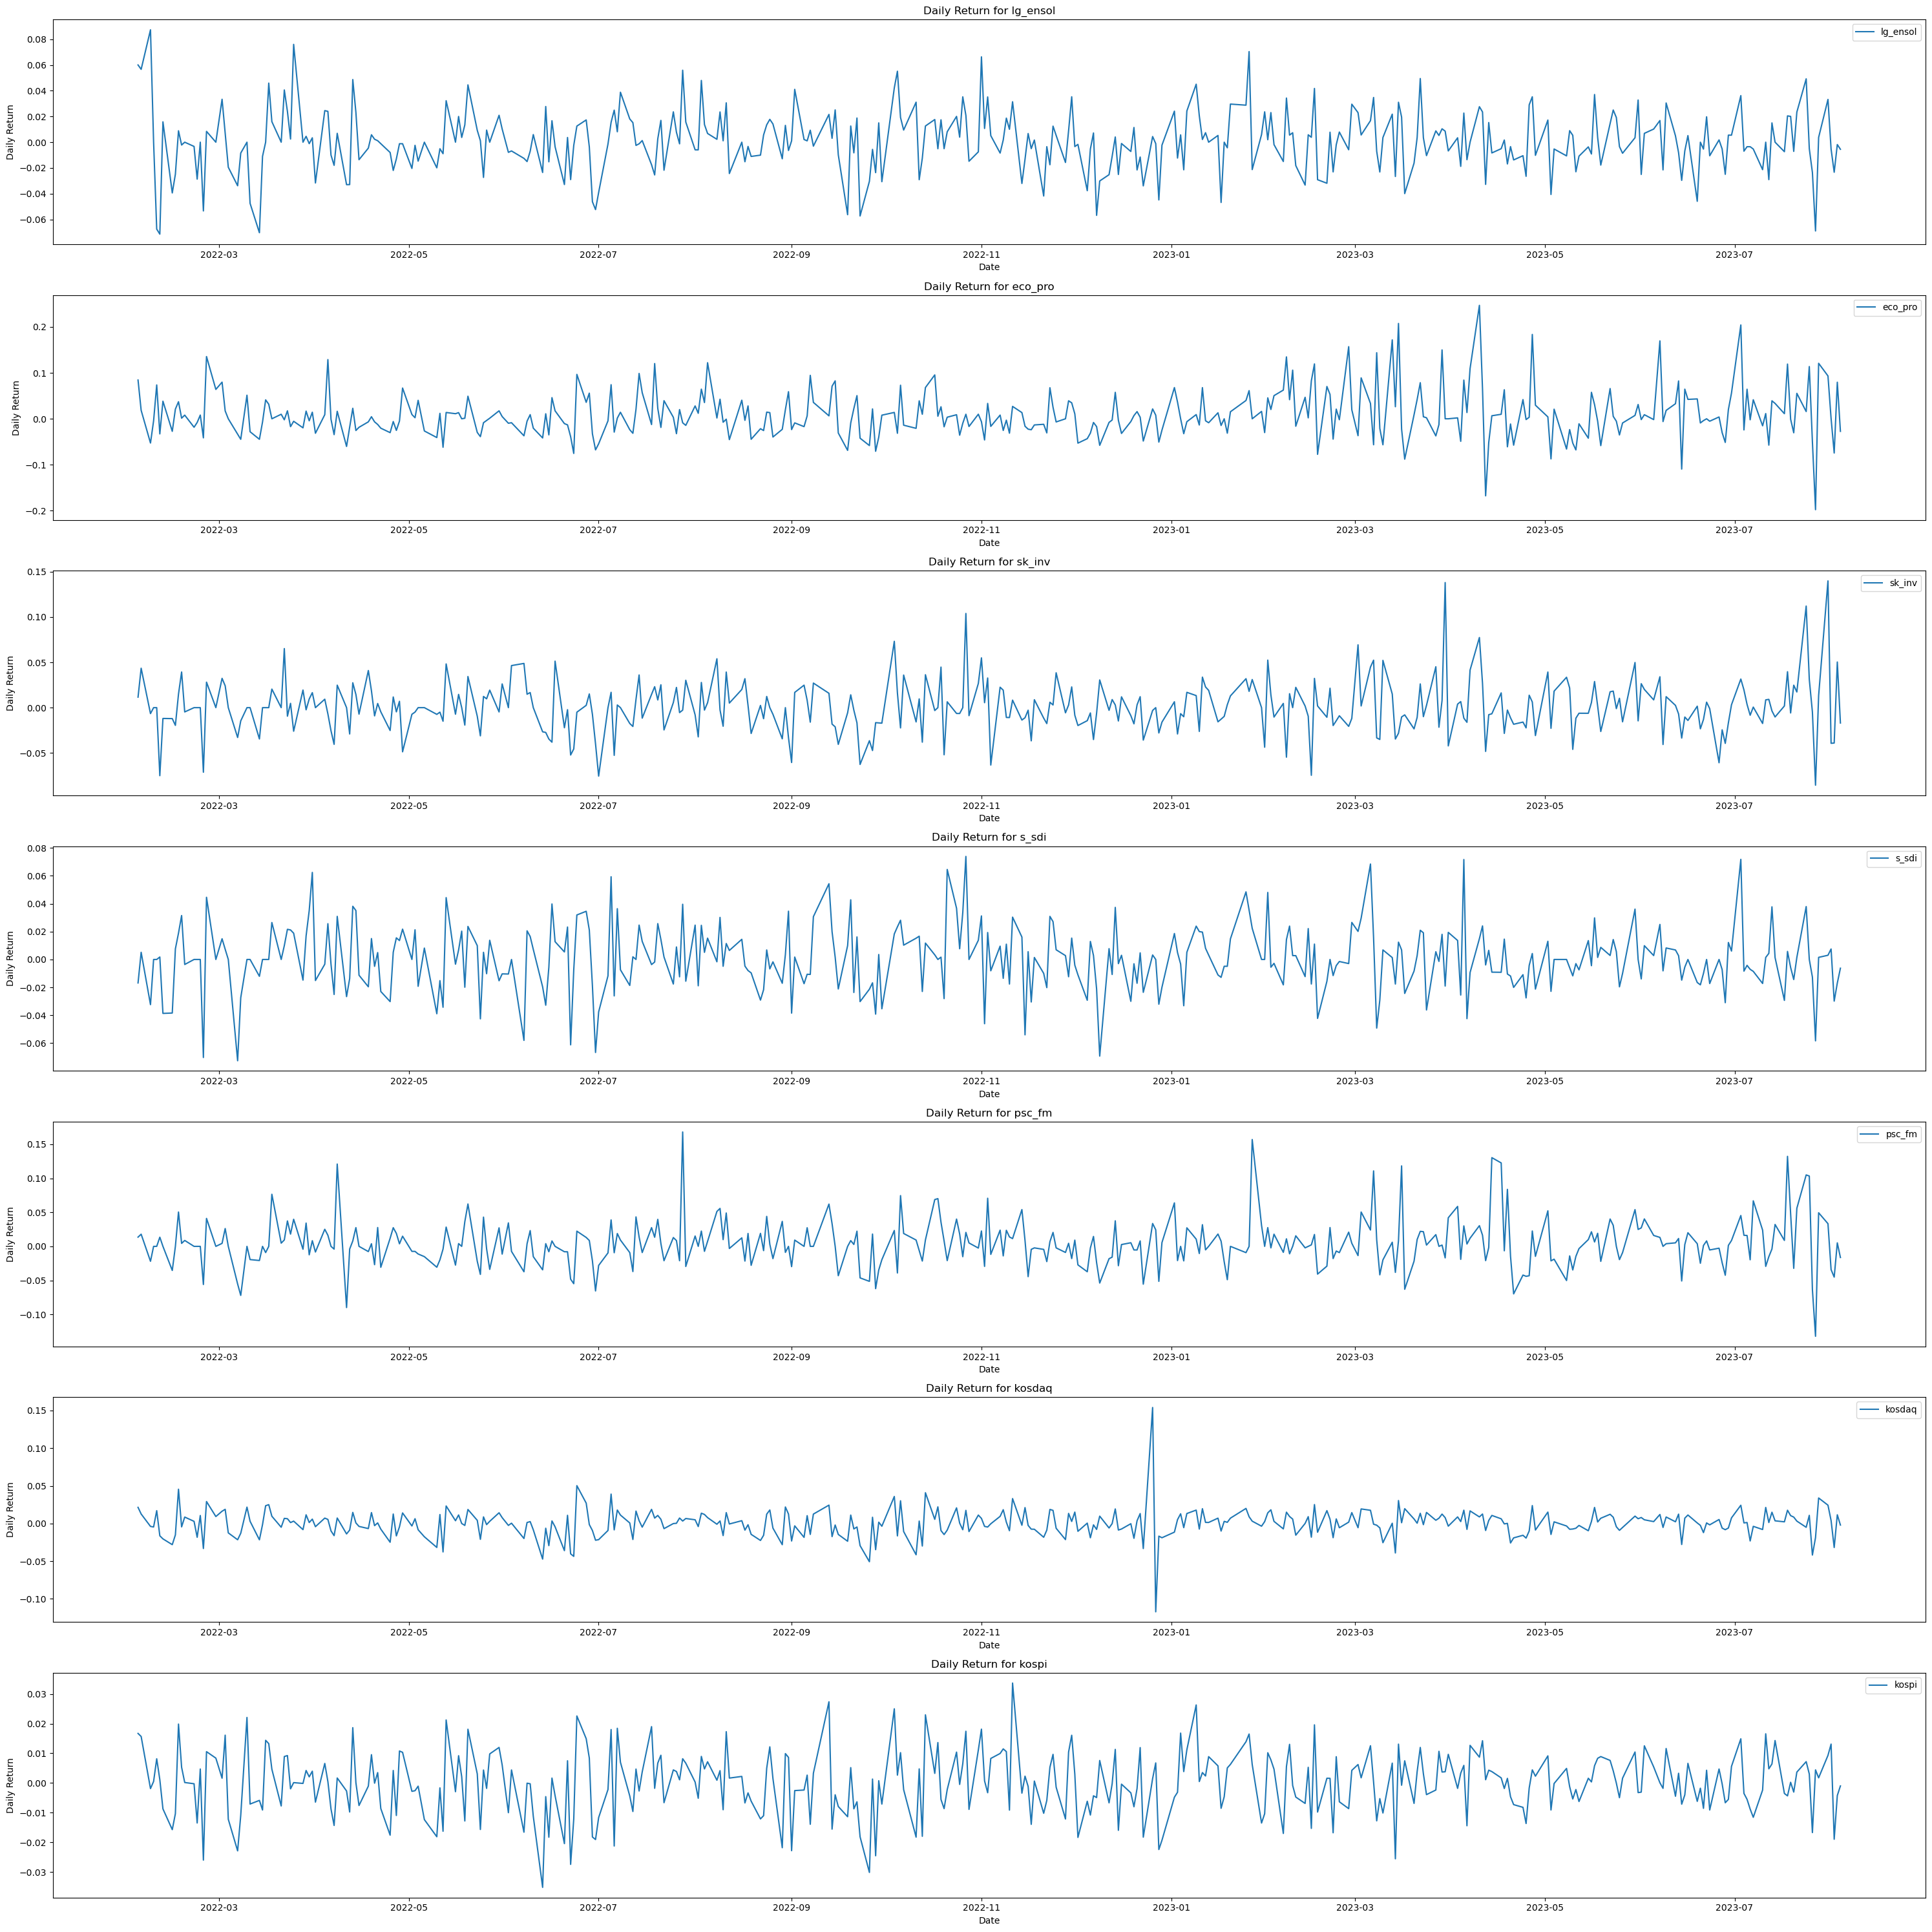

In [22]:
import matplotlib.pyplot as plt

# Create subplots for each column
fig, axes = plt.subplots(nrows=len(daily_return.columns), ncols=1, figsize=(30,30))

for i, column in enumerate(daily_return.columns):
    ax = axes[i]
    ax.plot(daily_return.index, daily_return[column], label=column)
    
    positive_returns = daily_return[column] >= 0
    positive_dates = daily_return.index[positive_returns]
    
    ax.set_xlabel('Date')
    ax.set_ylabel('Daily Return')
    ax.set_title(f'Daily Return for {column}')
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()


Histrogram for daily return

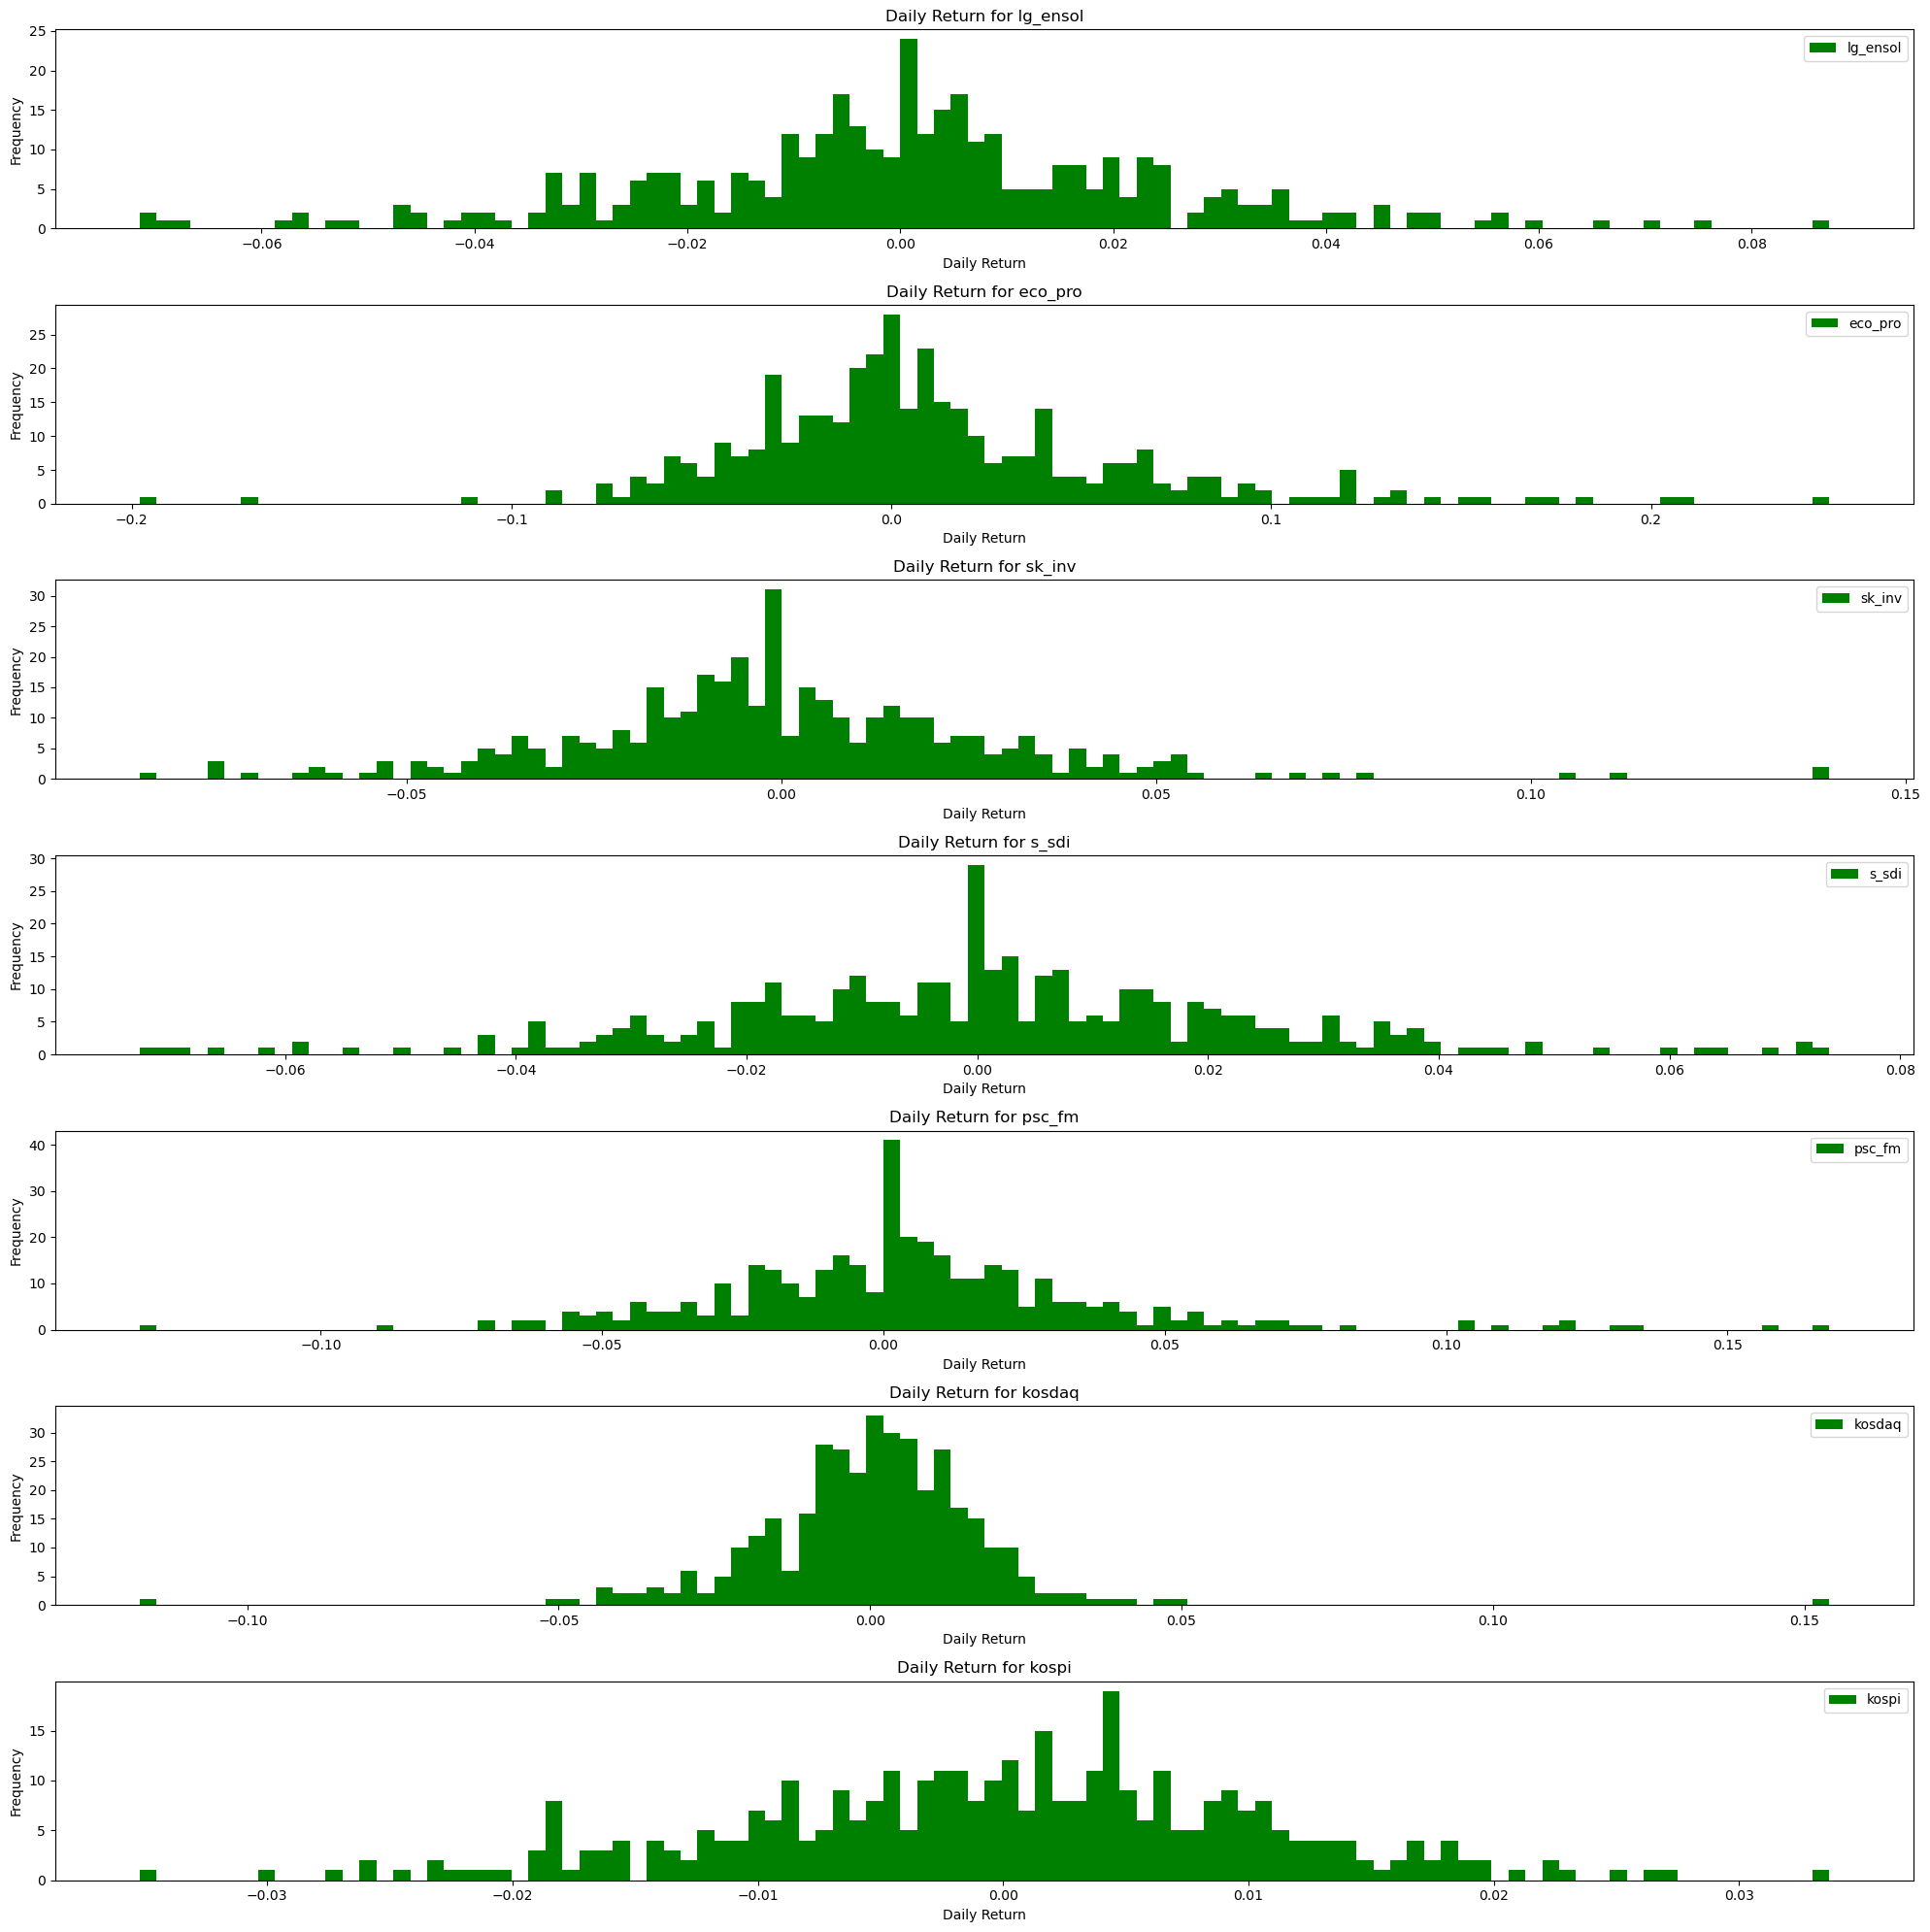

In [23]:
# Create subplots for each column
fig, axes = plt.subplots(nrows=len(daily_return.columns), ncols=1, figsize=(20,20))

for i, column in enumerate(daily_return.columns):
    ax = axes[i]
    n, bins, patches = ax.hist(daily_return[column], bins=100, color='green', label = column)
          
    ax.set_xlabel('Daily Return')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Daily Return for {column}')
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

To understand how daily return is spreaded out from the mean, I calculated daily return's standard devation and mean (assuming data is following normal distribution due to big sample size).

I can assume 'lg_ensol', 'eco_pro', 'sk_inv', 's_sdi', 'psc_fm', 'kosdaq', 'kospi' have the mean zero. 

In [29]:
daily_return.mean()

lg_ensol    0.000765
eco_pro     0.009178
sk_inv      0.000243
s_sdi       0.000449
psc_fm      0.004554
kosdaq      0.000305
kospi      -0.000007
dtype: float64

In [30]:
daily_return.std()

lg_ensol    0.023546
eco_pro     0.052016
sk_inv      0.028815
s_sdi       0.023079
psc_fm      0.035120
kosdaq      0.018411
kospi       0.010505
dtype: float64

As stocks have similar average returns, standard devation is good indication to check risk profile of stocks. As descending order of standard devation, eco_pro(0.052) >> psc_fm(0.035) > sk_inv(0.028) > lg_ensol = s_sdi(0.23) > kosdaq(0.018) > kospi(0.010).

A higher standard deviation indicates increased volatility and heightened uncertainty in a stock's performance, leading to a higher potential for both returns and risks. This theory is reaffirmed by the plots above. During periods of upward trends in the secondary batteries' sector stock prices, the stocks eco_pro and psc_fm exhibit significant day-to-day price increases, aligning with their relatively high standard deviation of daily returns. Conversely, this trend reverses when the stocks experience downtrends.






## 5-2. Cumulative return over 1 month 

Plot line plot for cumulative return over 1 month

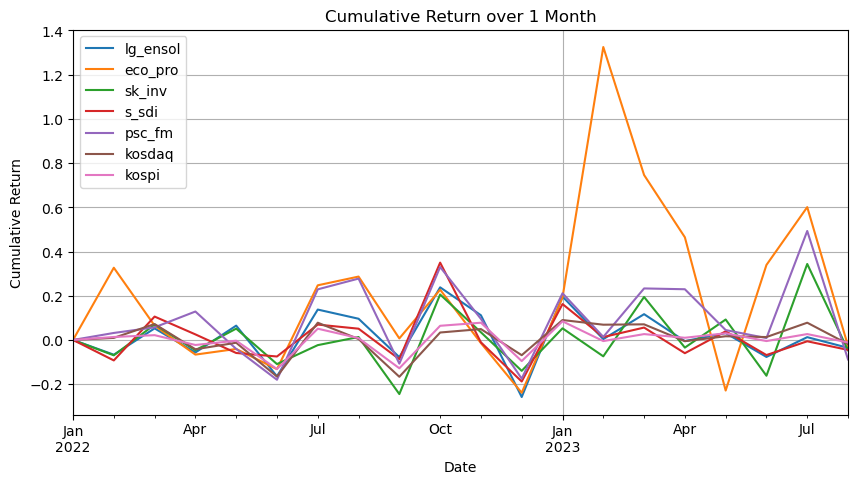

"\n (1 + daily_return): This step converts daily returns to daily cumulative returns\n resample('1M'): Resampling the DataFrame using a 1-month frequency. \n groups the data into non-overlapping 1-month periods, aggregating the values within each period.\n The aggregation function used by default is mean ->  we'll modify it in the next step.\n .prod(): Applying the product aggregation function. This calculates the product of the values within each 1-month period. \n When you multiply consecutive daily cumulative returns, you get the cumulative return over the whole period.\n - 1: Subtracting 1 from the result. This step converts the cumulative returns back to percentage values, \n so the result represents the percentage change over the 1-month period.\n\n"

In [94]:
# Calculate the cumulative daily return over 1 month
cumulative_return = (1 + daily_return[new_name]).resample('1M').prod() - 1

# Plot
fig, ax = plt.subplots(figsize=(10, 5))
cumulative_return.plot(ax=ax)

ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Return')
ax.set_title('Cumulative Return over 1 Month')

ax.grid(True)
ax.legend(loc='upper left')

plt.show()

'''
 (1 + daily_return): This step converts daily returns to daily cumulative returns
 resample('1M'): Resampling the DataFrame using a 1-month frequency. 
 groups the data into non-overlapping 1-month periods, aggregating the values within each period.
 The aggregation function used by default is mean ->  we'll modify it in the next step.
 .prod(): Applying the product aggregation function. This calculates the product of the values within each 1-month period. 
 When you multiply consecutive daily cumulative returns, you get the cumulative return over the whole period.
 - 1: Subtracting 1 from the result. This step converts the cumulative returns back to percentage values, 
 so the result represents the percentage change over the 1-month period.

'''

Standard deviation of cumulative return

In [41]:
cumulative_return.mean()

lg_ensol    0.015976
eco_pro     0.203959
sk_inv      0.005380
s_sdi       0.009031
psc_fm      0.089592
kosdaq      0.005219
kospi       0.000587
dtype: float64

In [42]:
cumulative_return.std()

lg_ensol    0.118519
eco_pro     0.373351
sk_inv      0.136048
s_sdi       0.112898
psc_fm      0.175969
kosdaq      0.072914
kospi       0.059191
dtype: float64

Standard deviation of cumulative return: eco_pro (0.37) > psc_fm(0.17) > sk_inv (0.13) > lg_ensol(0.11) > s_sdi(0.11) > kosdaq(0.07) > kospi(0.05)

The cumulative return of standard deviation displays a comparable descending order to that of daily returns. This suggests that over extended periods of uptrending stock prices, the prices of eco_pro and psc_fm also notably rise. This observation aligns with the evidence presented by the line plot of stock prices.

## 5-3. Daily return & Cumulative return

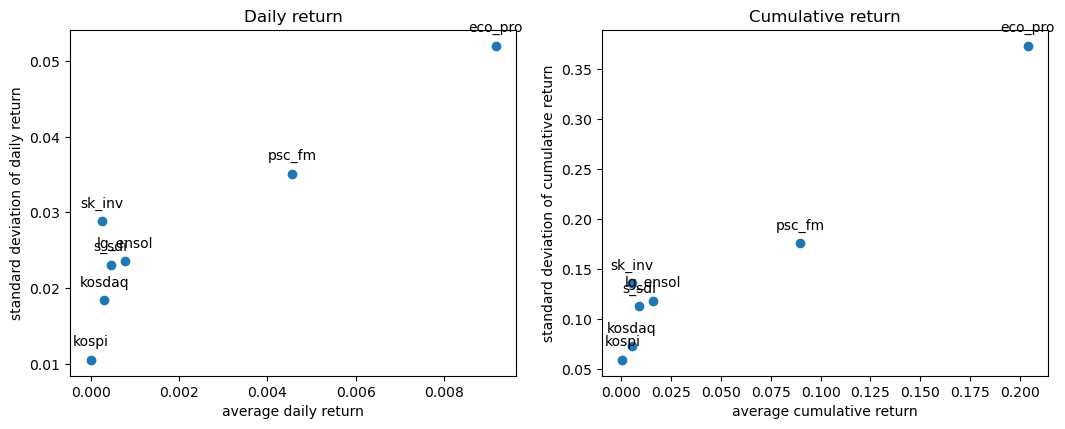

In [93]:
fig, axes = plt.subplots(1, 2, figsize = (16, 8))

#### for stock price 
ax1 = plt.subplot2grid((2, 3), (0, 0))

ax1.scatter(daily_return[new_name].mean(), daily_return[new_name].std())
ax1.set_xlabel('average daily return')    
ax1.set_ylabel('standard deviation of daily return')
ax1.set_title('Daily return')

for label, x, y in zip(new_name, daily_return[new_name].mean(), daily_return[new_name].std()):
    ax1.annotate(label,(x,y) , textcoords="offset points", xytext=(0,10), ha='center')

##### for volume 

ax2 = plt.subplot2grid((2, 3), (0, 1))

ax2.scatter(cumulative_return.mean(), cumulative_return.std())
ax2.set_xlabel('average cumulative return')    
ax2.set_ylabel('standard deviation of cumulative return')
ax2.set_title('Cumulative return')

for label, x, y in zip(new_name, cumulative_return.mean(), cumulative_return.std()):
    ax2.annotate(label,(x,y) , textcoords="offset points", xytext=(0,10), ha='center')


###### 
plt.tight_layout()
plt.show()

# 6. Correlation

I examined the correlation between various stock symbols. To achieve this, I calculate the correlation coefficient, to measure the intensity of the linear relationship between two distinct variables. Subsequently,I calculate the R-squared value to assess the adequacy of the regression line in accurately representing the real data.

## 6-1. Correlation

In [68]:
new_adjcls = adjcls_data[new_name]
new_adjcls

lg_ensol       eco_pro         sk_inv        s_sdi         psc_fm  \
Date                                                                            
2022-01-28  450000.0  6.301774e+04  216000.000000  593019.5000  110324.601562   
2022-02-03  477000.0  6.833365e+04  218500.000000  583036.0000  111822.218750   
2022-02-04  504000.0  6.959014e+04  228000.000000  586031.0625  113819.046875   
2022-02-07  548000.0  6.591733e+04  226500.000000  567062.4375  111323.015625   
2022-02-08  548000.0  6.562737e+04  226500.000000  567062.4375  111323.015625   
...              ...           ...            ...          ...            ...   
2023-07-31  560000.0  1.207000e+06  212968.640625  665000.0000  527000.000000   
2023-08-01  557000.0  1.208000e+06  204587.937500  670000.0000  509000.000000   
2023-08-02  544000.0  1.118000e+06  196601.609375  650000.0000  486000.000000   
2023-08-03  543000.0  1.207000e+06  206500.000000  639000.0000  488500.000000   
2023-08-04  540000.0  1.174000e+06  203000.000000  635000.0000  480500.000000   

                kosdaq        kospi  
Date                                 
2022-01-28  872.869995  2663.340088  
2022-02-03  891.599976  2707.820068  
2022-02-04  902.869995  2750.260010  
2022-02-07  899.400024  2745.060059  
2022-02-08  895.270020  2746.469971  
...                ...          ...  
2023-07-31  935.969971  2632.580078  
2023-08-01  939.669983  2667.070068  
2023-08-02  909.760010  2616.469971  
2023-08-03  920.320007  2605.389893  
2023-08-04  918.429993  2602.800049  

[374 rows x 7 columns]

Text(0.5, 1.0, 'Correlation of stock adjusted closing price')

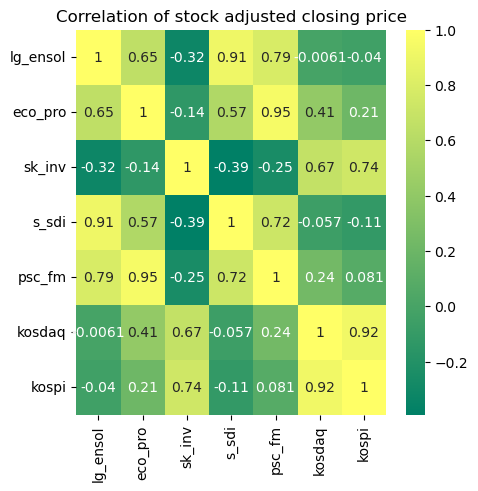

In [71]:
plt.figure(figsize=(5, 5))

sns.heatmap(new_adjcls.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock adjusted closing price')


Strong positive Correlation  
lg_ensol & s_sdi(0.91)  
lg_ensol & psc_fm (0.79)  
eco_pro & psc_fm (0.95)  
sk_inv & kospi (0.74)  
kosdaq & kospi (0.92)  

No correlation   
lg_ensol & kosdaq(0.0061)  
lg_ensol & kospi(-0.04)  
s_sdi & kosdaq(-0.057)  
psc_fm & kospi(0.081)

## 6-2. Scatter plots for R-Squared value

In [45]:
l_reg = LinearRegression()

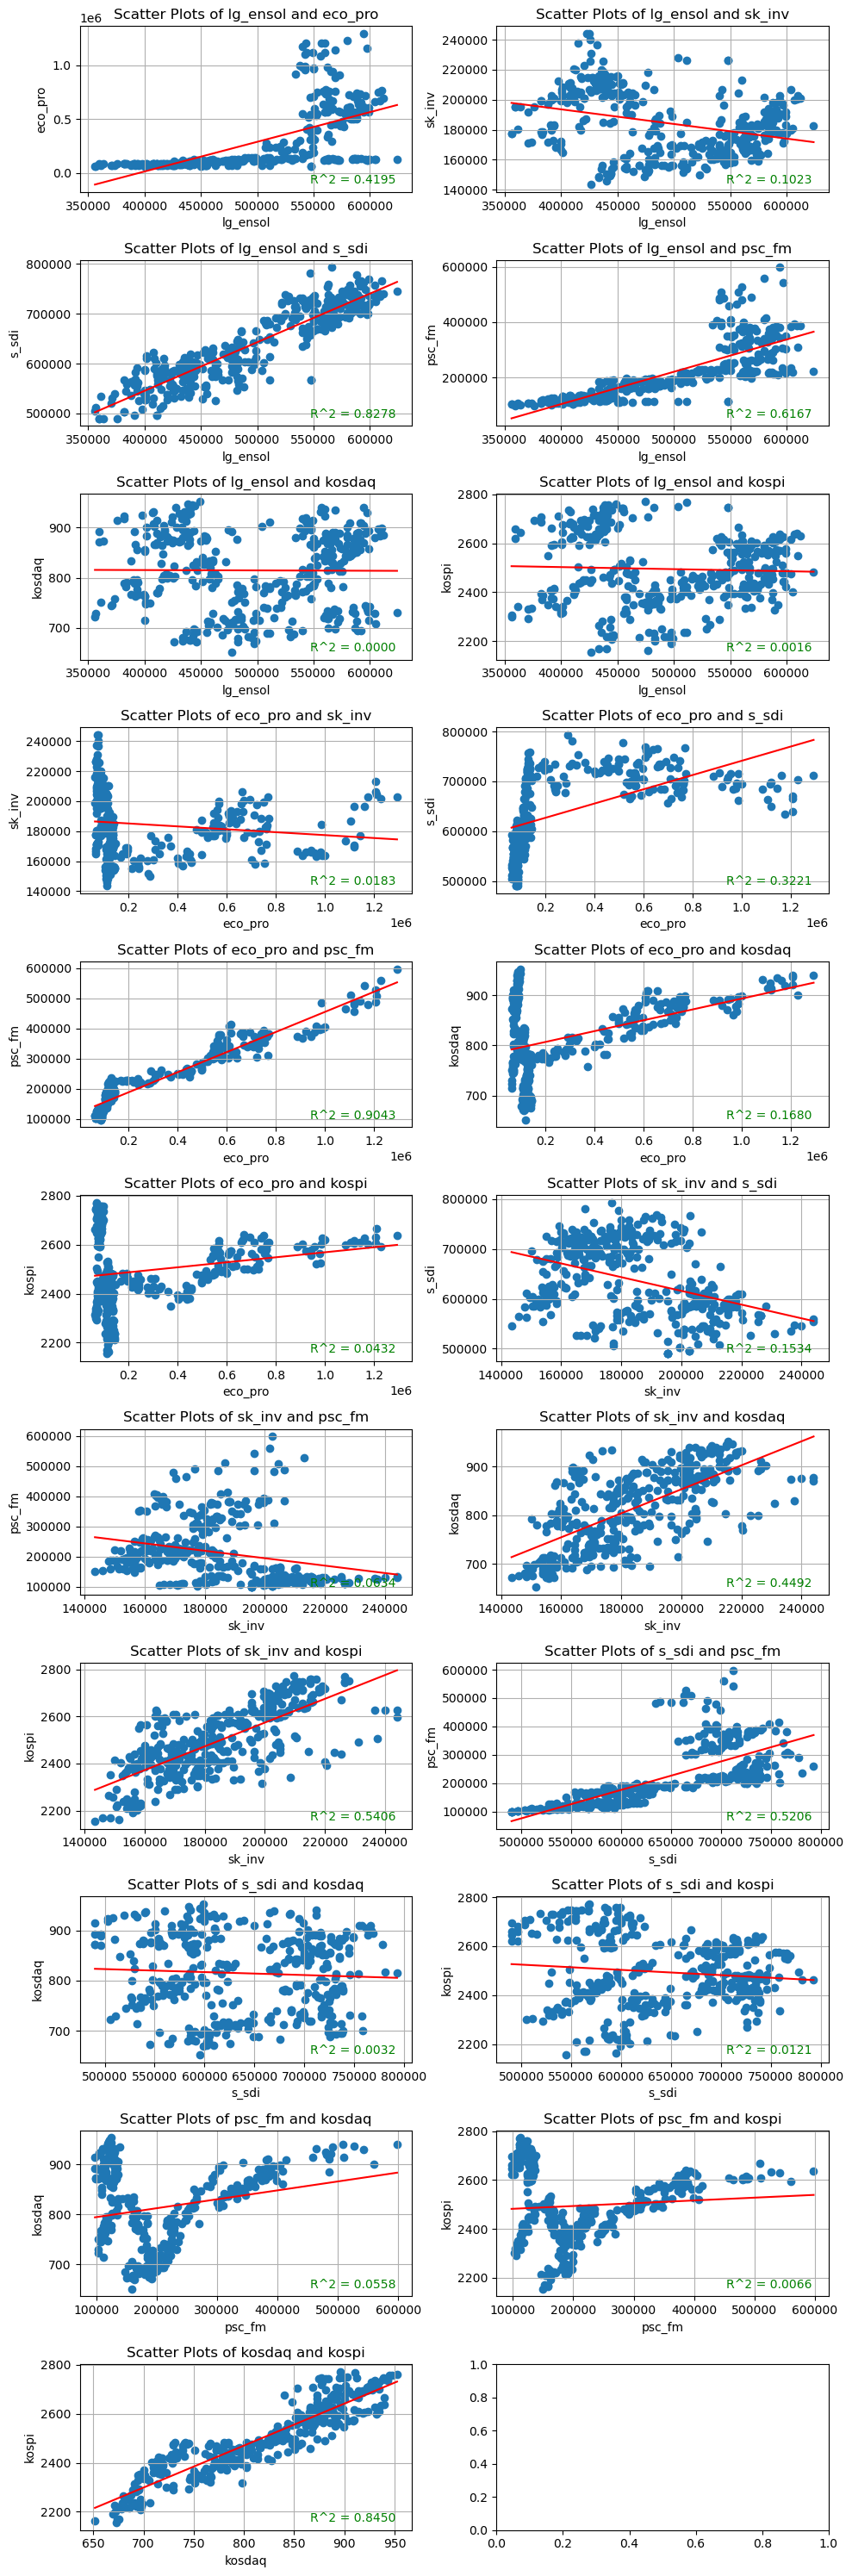

In [59]:
# Create scatter plots
fig, axes = plt.subplots(nrows=11, ncols=2, figsize=(10, 30))  # Adjust the figsize here
subplot_index = 0  # Start subplot index from 1

for i, v1 in enumerate(new_name):
    for j, v2 in enumerate(new_name):
        if i<j:
            ax = axes[subplot_index // 2, subplot_index % 2] 
            ax.scatter(adjcls_data[v1].values.reshape(-1,1), adjcls_data[v2].values.reshape(-1,1), 
                        label=f'{v1} vs {v2}')
            ax.set_xlabel(f'{v1}')
            ax.set_ylabel(f'{v2}')
            ax.set_title(f'Scatter Plots of {v1} and {v2}')
            ax.grid(True)
            subplot_index += 1
            
            # # Fit linear regression model
            data_symbol1 = adjcls_data[v1].values.reshape(-1, 1)
            data_symbol2 = adjcls_data[v2].values.reshape(-1, 1)
            l_reg.fit(data_symbol1, data_symbol2)
            
            x_predict = np.linspace(data_symbol1.min(), data_symbol1.max(), 100).reshape(-1, 1)
            y_predict = l_reg.predict(x_predict)
            
            ax.plot(x_predict, y_predict, c='r');
            
            # Calculate R-squared
            r_squared = l_reg.score(data_symbol1, data_symbol2)            
            
            # Display R-squared value in the plot
            ax.text(0.95, 0.05, f'R^2 = {r_squared:.4f}', transform=ax.transAxes, ha='right', fontsize=10, c='g')
               
# Adjust layout
plt.tight_layout()
plt.show()  

In [ ]:
# R-squared value for lg_ensol vs eco_pro: 0.4195
# R-squared value for lg_ensol vs sk_inv: 0.1023
# R-squared value for lg_ensol vs s_sdi: 0.8278
# R-squared value for lg_ensol vs psc_fm: 0.6167
# R-squared value for lg_ensol vs kosdaq: 0.0000
# R-squared value for lg_ensol vs kospi: 0.0016
# R-squared value for eco_pro vs sk_inv: 0.0183
# R-squared value for eco_pro vs s_sdi: 0.3221
# R-squared value for eco_pro vs psc_fm: 0.9043
# R-squared value for eco_pro vs kosdaq: 0.1680
# R-squared value for eco_pro vs kospi: 0.0432
# R-squared value for sk_inv vs s_sdi: 0.1534
# R-squared value for sk_inv vs psc_fm: 0.0634
# R-squared value for sk_inv vs kosdaq: 0.4492
# R-squared value for sk_inv vs kospi: 0.5406
# R-squared value for s_sdi vs psc_fm: 0.5206
# R-squared value for s_sdi vs kosdaq: 0.0032
# R-squared value for s_sdi vs kospi: 0.0121
# R-squared value for psc_fm vs kosdaq: 0.0558
# R-squared value for psc_fm vs kospi: 0.0066
# R-squared value for kosdaq vs kospi: 0.8450

In [65]:
# manual calculation of alpha and beta of linear regression
for i, v1 in enumerate(new_name):
    for j, v2 in enumerate(new_name):
        if i<j:
            data_symbol1 = adjcls_data[v1].values.reshape(-1, 1)
            data_symbol2 = adjcls_data[v2].values.reshape(-1, 1)
            l_reg.fit(data_symbol1, data_symbol2)
            
            x_predict = np.linspace(data_symbol1.min(), data_symbol1.max(), 100).reshape(-1, 1)
            y_predict = l_reg.predict(x_predict)
            
            beta = l_reg.coef_
            alpha = l_reg.intercept_            
            
            y_predict = beta * x_predict + alpha
            
            print(f'alpha and beta for {v1} and {v2} is {alpha}, {beta}') 

alpha and beta for lg_ensol and eco_pro is [-1087210.08521429], [[2.75404133]]
alpha and beta for lg_ensol and sk_inv is [232597.60591072], [[-0.0974925]]
alpha and beta for lg_ensol and s_sdi is [155102.30219103], [[0.97577382]]
alpha and beta for lg_ensol and psc_fm is [-365088.71161319], [[1.17069274]]
alpha and beta for lg_ensol and kosdaq is [818.02150598], [[-6.81017218e-06]]
alpha and beta for lg_ensol and kospi is [2536.60578308], [[-8.39883951e-05]]
alpha and beta for eco_pro and sk_inv is [187063.19946237], [[-0.00970638]]
alpha and beta for eco_pro and s_sdi is [598224.39706535], [[0.14315254]]
alpha and beta for eco_pro and psc_fm is [122214.27370472], [[0.33339046]]
alpha and beta for eco_pro and kosdaq is [784.97375907], [[0.00010821]]
alpha and beta for eco_pro and kospi is [2467.00246894], [[0.00010238]]
alpha and beta for sk_inv and s_sdi is [891591.32033802], [[-1.37798669]]
alpha and beta for sk_inv and psc_fm is [440654.87571825], [[-1.2309903]]
alpha and beta for s

The R-squared values close to 1 indicate strong regression lines. 
Following pairs and regression line:   
lg_ensol vs s_sdi (R-squared = 0.8278)  
y = 155102 x + 0.97577  

eco_pro vs psc_fm (R-squared = 0.9043)  
y = 122214 x + 0.33339

kosdaq vs kospi (R-squared = 0.8450)  
y = 1098.6 x + 1.7142

# 7. Conclusions 

Before finalizing the allocation of weights to each stock, it's crucial to assess and define my risk tolerance. Given the companies listed above have demonstrated stability and consistent profitability, my intention is to consider these stocks for a long-term investment strategy, particularly if their prices experience a noticeable decline. With this approach in mind, I am open to assuming a higher level of risk within this portfolio.

Considering the insights gained from the analysis, when constructing a portfolio focused on secondary batteries, it's essential to address the distinct volatility exhibited by stocks within the secondary battery sector. Notably, stocks in this sector display substantial fluctuations in both price and trading volume, indicating a heightened level of risk and potential for significant returns. Specifically, eco_pro and psc_fm exhibit pronounced high standard deviations, suggesting greater price volatility. This implies the potential for substantial gains during bullish market conditions, but also the possibility of substantial losses in bearish scenarios.

Furthermore, the analysis reveals a tendency for stocks within the secondary battery sector to move in tandem. In the event of a bearish market trend, it's plausible that the prices of all stocks within this sector could experience downward movement simultaneously.

Taking a broader macroeconomic perspective, it becomes evident that various factors, such as the decline in the credit rating of the United States and the consistent upward trend in US interest rates, could wield a substantial influence on global economies, South Korea's being no exception. The possibility of foreign investors withdrawing from the market due to unfavorable conditions could contribute to a bearish sentiment within the market.

Given these considerations, a prudent portfolio strategy could involve diversification across different volatility levels. Assigning a higher weight (20%) to the high-volatility stock (eco_pro) acknowledges its potential for substantial gains, but also the associated risk. Assigning moderate weights (30%) to stocks with moderate volatility (psc_fm and sk_inv) aims to balance risk and potential returns. Lastly, allocating the largest weight (50%) to stocks with the smallest volatility (lg_ensol and s_sdi) aims to provide stability to the portfolio.